In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

# Lab07-1. Tips

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ]) # (m,3)
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0]) # (m,)

x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]]) # (m',3)
y_test = torch.LongTensor([2, 2, 2]) # (m',)

## Model

In [5]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,3)
        
    def forward(self,x):
        return self.linear(x)

In [6]:
model = SoftmaxClassifierModel()

In [7]:
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

## Training

In [15]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        # H(x)
        prediction = model(x_train) # prediction = (m,3)
        
        # cost
        cost = F.cross_entropy(prediction, y_train) # classification
        
        # H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

## Test(Validation)

In [16]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test) # (m',3)
    predicted_classes = prediction.max(1)[1] # 각 행마다 가장 큰 값의 인덱스 가져오기
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)
    
    print('Accuracy: {}% Cost: {:.6f}'.format(correct_count / len(y_test) * 100, cost.item()))

## Run

In [17]:
train(model, optimizer, x_train, y_train)

epoch    0/20 Cost: 1.142985
epoch    1/20 Cost: 1.117769
epoch    2/20 Cost: 1.100901
epoch    3/20 Cost: 1.089523
epoch    4/20 Cost: 1.079872
epoch    5/20 Cost: 1.071320
epoch    6/20 Cost: 1.063325
epoch    7/20 Cost: 1.055720
epoch    8/20 Cost: 1.048378
epoch    9/20 Cost: 1.041245
epoch   10/20 Cost: 1.034285
epoch   11/20 Cost: 1.027478
epoch   12/20 Cost: 1.020813
epoch   13/20 Cost: 1.014279
epoch   14/20 Cost: 1.007872
epoch   15/20 Cost: 1.001586
epoch   16/20 Cost: 0.995419
epoch   17/20 Cost: 0.989365
epoch   18/20 Cost: 0.983424
epoch   19/20 Cost: 0.977591


In [18]:
test(model, optimizer, x_test, y_test) # 이미 오버피팅된 상태

Accuracy: 0.0% Cost: 1.346748


## Learning Rate
- learning rate이 너무 크면 발산하면서 cost가 늘어난다(overshooting)
- learning rate이 너무 작으면 cost가 줄어들지 않는다
- 적절한 숫자로 시작해서 발산하면 작게, cost가 줄어들지 않으면 크게 조정

In [19]:
# 발산
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e5)
train(model, optimizer, x_train, y_train)

epoch    0/20 Cost: 1.280268
epoch    1/20 Cost: 976950.687500
epoch    2/20 Cost: 1279135.125000
epoch    3/20 Cost: 1198379.125000
epoch    4/20 Cost: 1098825.625000
epoch    5/20 Cost: 1968197.625000
epoch    6/20 Cost: 284763.125000
epoch    7/20 Cost: 1532260.125000
epoch    8/20 Cost: 1651504.250000
epoch    9/20 Cost: 521878.437500
epoch   10/20 Cost: 1397263.125000
epoch   11/20 Cost: 750986.250000
epoch   12/20 Cost: 918691.750000
epoch   13/20 Cost: 1487888.125000
epoch   14/20 Cost: 1582260.125000
epoch   15/20 Cost: 685818.000000
epoch   16/20 Cost: 1140048.750000
epoch   17/20 Cost: 940566.750000
epoch   18/20 Cost: 931638.125000
epoch   19/20 Cost: 1971322.625000


In [20]:
# 줄어들지 않는 cost
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-10)
train(model, optimizer, x_train, y_train)

epoch    0/20 Cost: 3.187324
epoch    1/20 Cost: 3.187324
epoch    2/20 Cost: 3.187324
epoch    3/20 Cost: 3.187324
epoch    4/20 Cost: 3.187324
epoch    5/20 Cost: 3.187324
epoch    6/20 Cost: 3.187324
epoch    7/20 Cost: 3.187324
epoch    8/20 Cost: 3.187324
epoch    9/20 Cost: 3.187324
epoch   10/20 Cost: 3.187324
epoch   11/20 Cost: 3.187324
epoch   12/20 Cost: 3.187324
epoch   13/20 Cost: 3.187324
epoch   14/20 Cost: 3.187324
epoch   15/20 Cost: 3.187324
epoch   16/20 Cost: 3.187324
epoch   17/20 Cost: 3.187324
epoch   18/20 Cost: 3.187324
epoch   19/20 Cost: 3.187324


In [21]:
# 적당한 lr
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train(model, optimizer, x_train, y_train)

epoch    0/20 Cost: 1.341574
epoch    1/20 Cost: 1.198802
epoch    2/20 Cost: 1.150877
epoch    3/20 Cost: 1.131977
epoch    4/20 Cost: 1.116242
epoch    5/20 Cost: 1.102514
epoch    6/20 Cost: 1.089676
epoch    7/20 Cost: 1.077479
epoch    8/20 Cost: 1.065775
epoch    9/20 Cost: 1.054511
epoch   10/20 Cost: 1.043655
epoch   11/20 Cost: 1.033187
epoch   12/20 Cost: 1.023091
epoch   13/20 Cost: 1.013356
epoch   14/20 Cost: 1.003968
epoch   15/20 Cost: 0.994917
epoch   16/20 Cost: 0.986189
epoch   17/20 Cost: 0.977775
epoch   18/20 Cost: 0.969660
epoch   19/20 Cost: 0.961836


## Data Preprocessing

In [23]:
x_train = torch.FloatTensor([[73,83,75],
                            [93,88,93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

### Standardzation(정규분포)

In [25]:
mu = x_train.mean(dim=0) # 세로 기준
print(mu)

tensor([84.8000, 85.2000, 85.6000])


In [27]:
sigma = x_train.std(dim=0)
print(sigma)

tensor([11.0544, 12.0291, 12.6214])


In [28]:
norm_x_train = (x_train - mu) / sigma

In [30]:
print(norm_x_train) # 정규분포를 따르는 data set

tensor([[-1.0674, -0.1829, -0.8398],
        [ 0.7418,  0.2328,  0.5863],
        [ 0.3799,  0.4822,  0.3486],
        [ 1.0132,  1.0641,  1.1409],
        [-1.0674, -1.5961, -1.2360]])


In [31]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)

In [33]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

## Training with Preprocessed Data


In [34]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        
        # H(x)
        prediction = model(x_train) # (m,1)
        
        # cost
        cost = F.mse_loss(prediction, y_train)
        
        # H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [37]:
train(model, optimizer, norm_x_train, y_train)

epoch    0/20 Cost: 29476.503906
epoch    1/20 Cost: 18732.742188
epoch    2/20 Cost: 11949.518555
epoch    3/20 Cost: 7636.165039
epoch    4/20 Cost: 4883.999023
epoch    5/20 Cost: 3125.119873
epoch    6/20 Cost: 2000.174561
epoch    7/20 Cost: 1280.415649
epoch    8/20 Cost: 819.816589
epoch    9/20 Cost: 525.033325
epoch   10/20 Cost: 336.358704
epoch   11/20 Cost: 215.590012
epoch   12/20 Cost: 138.281021
epoch   13/20 Cost: 88.787140
epoch   14/20 Cost: 57.095325
epoch   15/20 Cost: 36.797890
epoch   16/20 Cost: 23.793510
epoch   17/20 Cost: 15.457666
epoch   18/20 Cost: 10.110308
epoch   19/20 Cost: 6.676270


---

# Lab07-2 MNIST Introduction

In [38]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [41]:
# data download
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

100.0%


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



102.8%


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



100.0%


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



112.7%

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw




C:\Users\user\anaconda3\envs\PyTorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [43]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

### setting

In [47]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)

# parameters
training_epochs = 15
batch_size = 100

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# cost/loss & optinizer
criterion = torch.nn.CrossEntropyLoss().to(device) # softmax is internally computed
optimizer= torch.optim.SGD(linear.parameters(), lr=0.1)

### training

In [48]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X,Y in data_loader:
        # reshape input data
        # label is not one-hot encoded
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward() # 100개 데이터에 대한 평균 loss
        optimizer.step()
        
        avg_cost = avg_cost + cost/total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('finished')
        

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422705
finished


### Test & Visualization

Accuracy: 88.83%
Label:  2
Prediction:  8


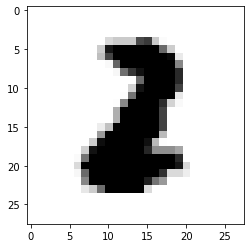

In [68]:
# test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    
    p_sum = correct_prediction.float().sum() # 1의 개수, 맞게 예측한 개수
    p_num = len(Y_test) # 전체 데이터의 크기
    accuracy = 100 * p_sum / p_num
    #accuracy = correct_prediction.float().mean()
    print('Accuracy: {:.2f}%'.format(accuracy.item()))
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    